<center><h1>KOLHE_PRANAV_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math

Get the Vertebral Column Data Set

In [2]:
af = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
af

(array([( 63.0278175 , 22.55258597,  39.60911701,  40.47523153,  98.67291675, -2.54399986e-01, b'Abnormal'),
        ( 39.05695098, 10.06099147,  25.01537822,  28.99595951, 114.4054254 ,  4.56425864e+00, b'Abnormal'),
        ( 68.83202098, 22.21848205,  50.09219357,  46.61353893, 105.9851355 , -3.53031731e+00, b'Abnormal'),
        ( 69.29700807, 24.65287791,  44.31123813,  44.64413017, 101.8684951 ,  1.12115234e+01, b'Abnormal'),
        ( 49.71285934,  9.65207488,  28.317406  ,  40.06078446, 108.1687249 ,  7.91850062e+00, b'Abnormal'),
        ( 40.25019968, 13.92190658,  25.1249496 ,  26.32829311, 130.3278713 ,  2.23065173e+00, b'Abnormal'),
        ( 53.43292815, 15.86433612,  37.16593387,  37.56859203, 120.5675233 ,  5.98855070e+00, b'Abnormal'),
        ( 45.36675362, 10.75561143,  29.03834896,  34.61114218, 117.2700675 , -1.06758708e+01, b'Abnormal'),
        ( 43.79019026, 13.5337531 ,  42.69081398,  30.25643716, 125.0028927 ,  1.32890182e+01, b'Abnormal'),
        ( 36.686352

In [3]:
data = pd.DataFrame(af[0])
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [4]:
data['class'] = data['class'].replace([b'Normal'], 0)
data['class'] = data['class'].replace([b'Abnormal'], 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

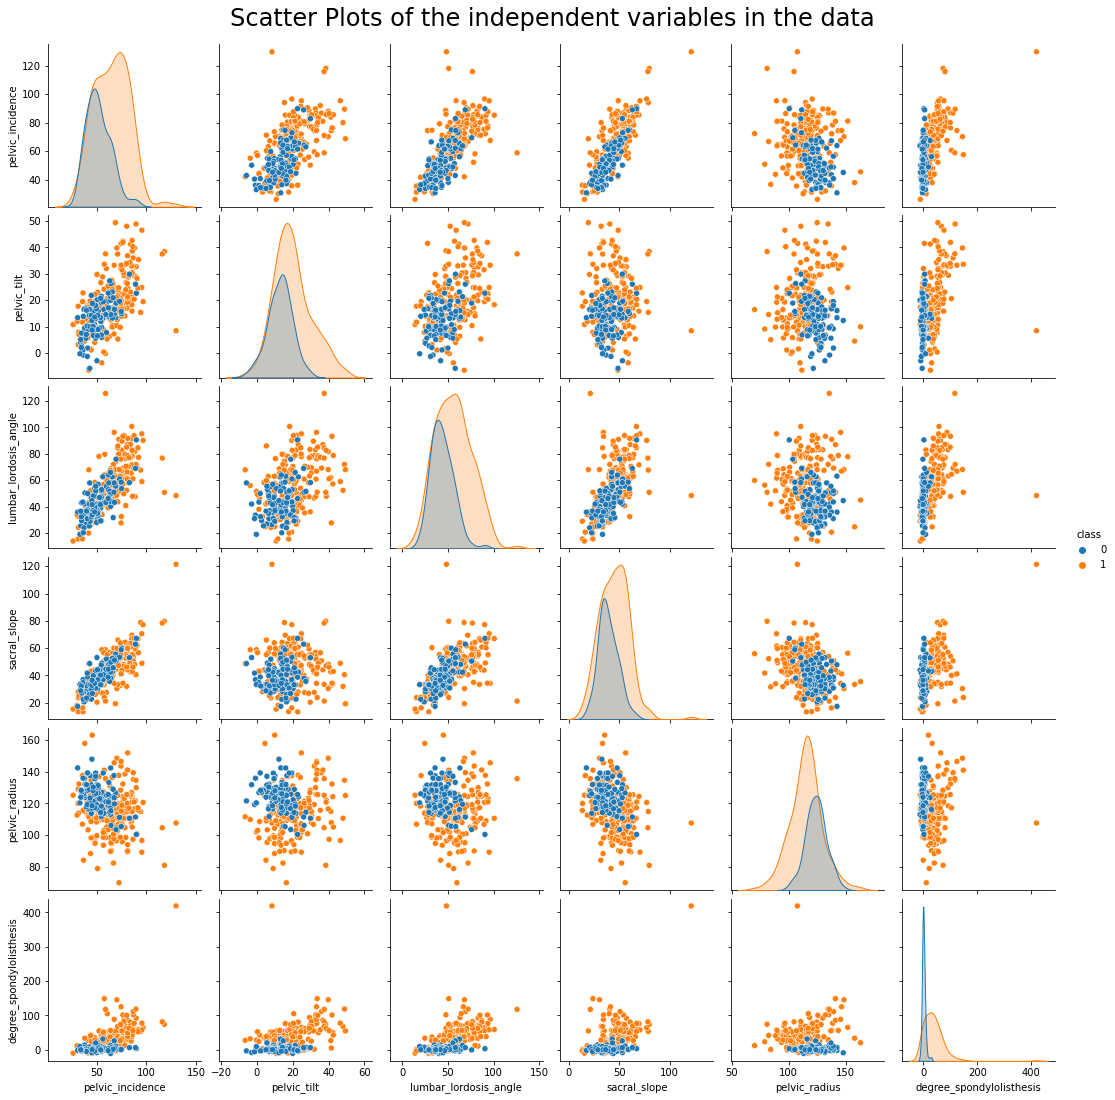

In [5]:
sns.pairplot(data, hue='class')
plt.suptitle("Scatter Plots of the independent variables in the data", fontsize=24, y=1.02)
plt.show()

#### ii. Boxplots

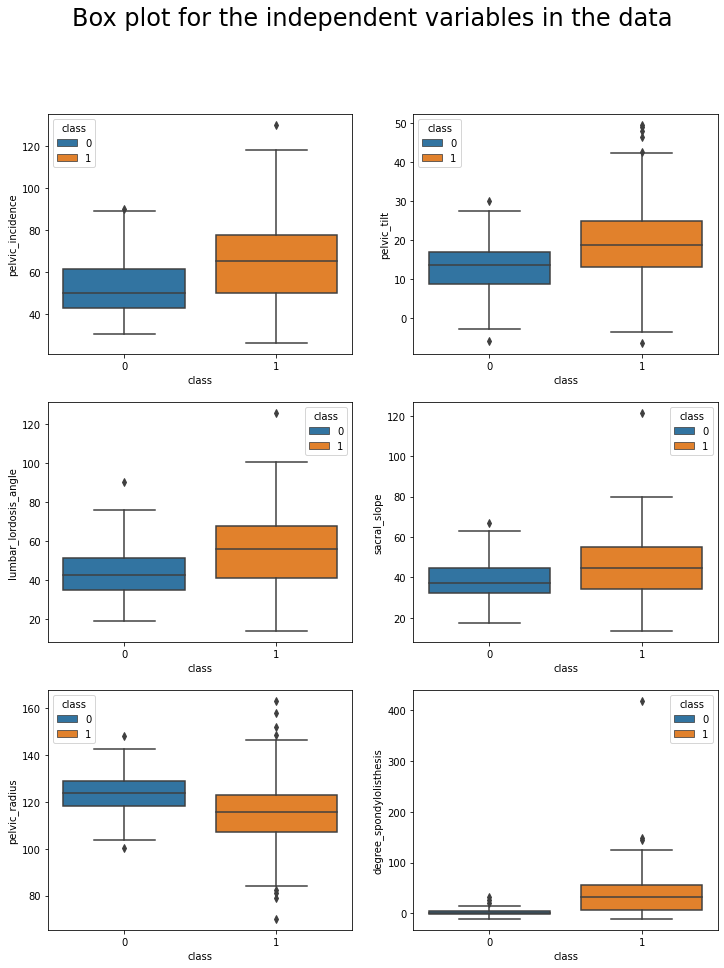

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
plt.suptitle("Box plot for the independent variables in the data", fontsize=24)

sns.boxplot(data=data, x='class', y='pelvic_incidence', hue='class', ax=axes[0, 0], dodge=False)
sns.boxplot(data=data, x='class', y='pelvic_tilt', hue='class', ax=axes[0, 1], dodge=False)
sns.boxplot(data=data, x='class', y='lumbar_lordosis_angle', hue='class', ax=axes[1, 0], dodge=False)
sns.boxplot(data=data, x='class', y='sacral_slope', hue='class', ax=axes[1, 1], dodge=False)
sns.boxplot(data=data, x='class', y='pelvic_radius', hue='class', ax=axes[2, 0], dodge=False)
sns.boxplot(data=data, x='class', y='degree_spondylolisthesis', hue='class', ax=axes[2, 1], dodge=False)

plt.show()

#### iii. Split Data Set

In [7]:
training_set_0 = data.loc[data['class']==0][:70]
test_set_0 = data.loc[data['class']==0][70:]

training_set_1 = data.loc[data['class']==1][:140]
test_set_1 = data.loc[data['class']==1][140:]

training_set = pd.concat([training_set_0, training_set_1])
test_set = pd.concat([test_set_0, test_set_1])

x_train = training_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_train = training_set[['class']]
x_test = test_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_test = test_set[['class']]

### (c) Classification

#### i. Euclidean Metric

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### ii. Test Data

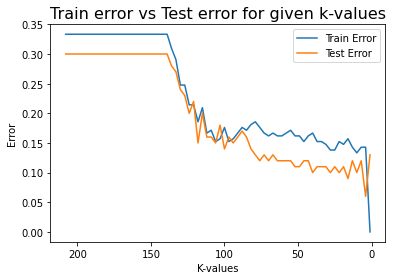

In [9]:
k_list = [i for i in range(208,0,-3)]
train_error = []
test_error = []
min_error = float('inf')
opt_k = float('inf')

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train.values.ravel())
    train_error.append(1-knn.score(x_train, y_train))
    test_error.append(1-knn.score(x_test, y_test))
    te = 1-knn.score(x_test, y_test)
    if te<min_error:
        min_error = te
        opt_k = k

plt.plot(k_list, train_error, label="Train Error")
plt.plot(k_list, test_error, label="Test Error")
plt.title('Train error vs Test error for given k-values', fontsize = 16)
plt.xlabel("K-values")
plt.ylabel("Error")
plt.legend()
plt.gca().invert_xaxis()
plt.show()

In [10]:
print('Optimal k = ', opt_k)

Optimal k =  4


Here, k=4 is the most suitable k for the model

In [11]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(x_train, y_train.values.ravel())

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix: " , cm)
print("True Positive Rate: " , tpr)
print("True Negative Rate: " , tnr)
print("Precision: " , precision)
print("F1-score when k=4: " , f1_score)

Confusion Matrix:  [[25  5]
 [ 1 69]]
True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334
Precision:  0.9324324324324325
F1-score when k=4:  0.9583333333333333


#### iii. Learning Curve

In [12]:
train_set_short = [i for i in range(10,211,10)]
best_test_error_rate = dict()
opt_k = []

for N in train_set_short:
    training_set_0 = data.loc[data['class']==0][:N//3] 
    training_set_1 = data.loc[data['class']==1][:(N-N//3)] 
    training_set = pd.concat([training_set_0, training_set_1])
    x_train = training_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    y_train = training_set[['class']]
    
    k_list = [k for k in range(1, N, 5)]
    test_error = []
    train_error = []
    min_test_error = float('inf')
    optk = None
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(x_train, y_train.values.ravel())  
        test_error.append(1-knn.score(x_test, y_test))
        test_err = 1 - knn.score(x_test, y_test)
        if test_err < min_test_error:
            min_test_error = test_err
            optk = k
    best_test_error_rate[N] = min_test_error
    opt_k.append(optk)

N and its corresponding Optimal K:
 {10: 1, 20: 6, 30: 1, 40: 11, 50: 26, 60: 21, 70: 26, 80: 31, 90: 41, 100: 6, 110: 6, 120: 16, 130: 16, 140: 16, 150: 16, 160: 6, 170: 6, 180: 6, 190: 6, 200: 6, 210: 6}


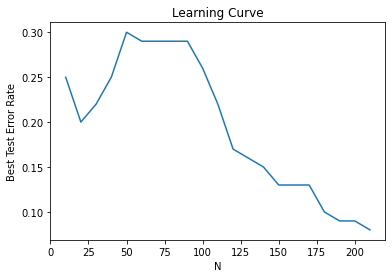

In [13]:
disp =  dict(zip(train_set_short, opt_k))
print("N and its corresponding Optimal K:\n" , disp)
plt.plot(train_set_short, best_test_error_rate.values())
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Best Test Error Rate')

plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [14]:
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error and k != 1:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

In [15]:
print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  6
Corresponding Test Error =  0.10999999999999999


Here, it originally gives k=1 with 0.10999999999999999 error rate, but we ignore k=1 as it causes overfitting. Hence, k=6 is the optimal k

In [16]:
summary = dict()
values = [int(opt_k), min_test_error]
summary['Manhattan'] = values

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [17]:
best_p = None
min_test_error = float('inf')
test_error = []

for lp in np.arange(0.1, 1.1, 0.1):  
    p = 10**lp
    knn = KNeighborsClassifier(n_neighbors=6, p=p)
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test)) 
    test_err = 1 - knn.score(x_test, y_test)
    if test_err < min_test_error and k != 1:
        min_test_error = test_err
        best_p = lp
        
print("Best log10(p) = " , best_p)
print("Corresponding Test Error = " , min_test_error)

Best log10(p) =  0.6
Corresponding Test Error =  0.06000000000000005


In [18]:
values = [int(opt_k), min_test_error]
summary['Log10(p)=0.6'] = values

##### C. Chebyshev Distance With p -> infinity.

In [19]:
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error and k != 1:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

In [20]:
print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  16
Corresponding Test Error =  0.07999999999999996


In [21]:
values = [int(opt_k), min_test_error]
summary['Chebyshev'] = values

#### ii. Mahalanobis Distance.

In [22]:
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

X_train = x_train
cov_x = np.cov(X_train, rowvar=False)
inv_x = np.linalg.pinv(cov_x)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI': inv_x})
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error and k != 1:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

In [23]:
print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  6
Corresponding Test Error =  0.16000000000000003


In [24]:
values = [int(opt_k), min_test_error]
summary['Mahalanobis'] = values

**SUMMARY**

In [25]:
summary_table = pd.DataFrame(summary).T
summary_table.columns = ["Optimal K", "Best Test Error Rate"]
summary_table['Optimal K'] = summary_table.astype(int)
print(summary_table)

              Optimal K  Best Test Error Rate
Manhattan             6                  0.11
Log10(p)=0.6          6                  0.06
Chebyshev            16                  0.08
Mahalanobis           6                  0.16


### (e) Weighted Decision

In [26]:
# Euclidean Distance
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  6
Corresponding Test Error =  0.09999999999999998


In [27]:
# Manhattan Distance
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  26
Corresponding Test Error =  0.09999999999999998


In [28]:
# Chebyshev Distance
k_list = [i for i in range(1,197,5)]
test_error = []

min_test_error = float('inf')
optk = None

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn.fit(x_train, y_train.values.ravel())
    test_error.append(1-knn.score(x_test, y_test))   
    test_err = 1 - knn.score(x_test, y_test)
    
    if test_err < min_test_error:
        min_test_error = test_err
        optk = k
test_error.append(min_test_error)
opt_k = optk

print("Optimal k = " , opt_k)
print("Corresponding Test Error = " , min_test_error)

Optimal k =  16
Corresponding Test Error =  0.10999999999999999


Here,
1. For Euclidean Distance: 
                           Optimal k = 6
                           Corresponding Test Error = 0.09999999999999998 
2. For Manhattan Distance: 
                           Optimal k = 26
                           Corresponding Test Error = 0.09999999999999998 
3. For Chebyshev Distance: 
                           Optimal k = 16
                           Corresponding Test Error = 0.10999999999999999 

### (f) Training Error Rate

The lowest training error rate of 0 is achieved when k=1. 
This occurs because at k=1, each data point ends up choosing itself as the closest neighbor. 
Hence, when we use k=1, the model prediction fits perfectly on our original data points, giving a training error rate of 0.